In [11]:
# magic function para hacer que los graficos de matplotlib se renderizen en el notebook.
%matplotlib inline

import datetime as datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('default') # haciendo los graficos un poco mas bonitos xD
#plt.rcParams['figure.figsize'] = (15, 5)

import seaborn as sns

In [12]:
casos_policiales = pd.read_csv('casos_policiales.csv')

In [13]:
respuestas_batman = pd.read_csv('respuestas_batman.csv')

In [14]:
casos_policiales

,fecha,id_caso,descripcion,estado_caso,categoria,latitud,longitud
0,4/5/2019,135,Donec consectetur nulla et sem.,1,robo,75.36,18.18
1,3/4/2018,183,Aliquam vel enim a massa.,3,asesinato,75.07,18.91
2,3/29/2020,145,"Nulla risus sem, rhoncus sed.",3,secuestro,76.43,17.08
3,11/29/2018,102,Fusce volutpat lectus eu cursus.,2,domestico,76.01,17.15
4,2/25/2019,150,"Aenean eu leo porta, vestibulum.",3,robo,76.29,18.55
5,10/11/2019,121,Nam eu auctor tortor. Donec.,2,asesinato,75.76,18.34
6,5/26/2018,151,Suspendisse quis vehicula enim. Nullam.,2,secuestro,75.54,19.18
7,2/25/2019,105,"Proin et urna aliquam, lacinia.",3,domestico,76.96,19.85
8,6/20/2018,135,Phasellus sed lorem sed elit.,3,robo,75.87,19.78
9,2/24/2019,137,"Nullam lorem tortor, suscipit sed.",3,asesinato,76.24,18.84


In [15]:
respuestas_batman

,id_caso,respuesta
0,135,0
1,183,1
2,145,1
3,102,1
4,150,0
5,121,1
6,151,1
7,105,1
8,135,1
9,137,0


In [20]:
#genero nuevo dataframe agrupado por estado de caso y categoria
casos_policiales_estado_categoria = casos_policiales.groupby(['categoria','estado_caso']).agg({'id_caso':'count'})
casos_policiales_estado_categoria

id_caso
categoria estado_caso         
asesinato 2                  4
          3                  3
domestico 2                  5
          3                  1
robo      1                  1
          2                  2
          3                  6
secuestro 2                  2
          3                  3

In [23]:
#reordeno multi index con stack
casos_policiales_estado_categoria_unstacked = casos_policiales_estado_categoria.unstack()
casos_policiales_estado_categoria_unstacked

id_caso          
estado_caso       1    2    3
categoria                    
asesinato       NaN  4.0  3.0
domestico       NaN  5.0  1.0
robo            1.0  2.0  6.0
secuestro       NaN  2.0  3.0

In [24]:
#renombro columnas
casos_policiales_estado_categoria_unstacked.columns = [['abierto','resuelto','cerrado_sin_resolucion']]
casos_policiales_estado_categoria_unstacked

,abierto,resuelto,cerrado_sin_resolucion
categoria,,,
asesinato,NaN,4.0,3.0
domestico,NaN,5.0,1.0
robo,1.0,2.0,6.0
secuestro,NaN,2.0,3.0


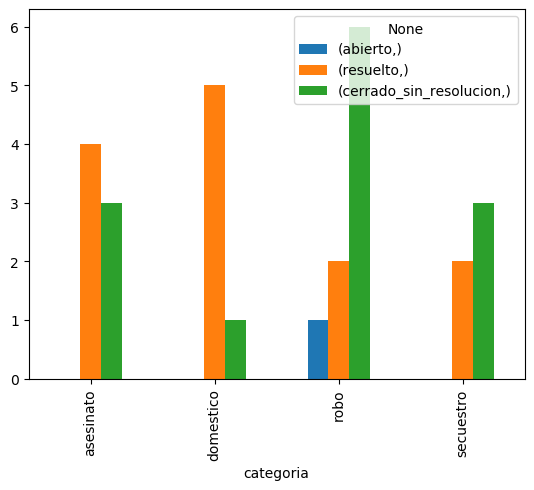

In [25]:
casos_policiales_estado_categoria_unstacked.plot(kind='bar')

In [26]:
#ahora veremos la resolucion segun la participacion de batman
#genero un nuevo dataframe con merge
participacion_de_batman = pd.merge(casos_policiales,respuestas_batman, on='id_caso')
participacion_de_batman

,fecha,id_caso,descripcion,estado_caso,categoria,latitud,longitud,respuesta
0,4/5/2019,135,Donec consectetur nulla et sem.,1,robo,75.36,18.18,0
1,4/5/2019,135,Donec consectetur nulla et sem.,1,robo,75.36,18.18,1
2,6/20/2018,135,Phasellus sed lorem sed elit.,3,robo,75.87,19.78,0
3,6/20/2018,135,Phasellus sed lorem sed elit.,3,robo,75.87,19.78,1
4,3/4/2018,183,Aliquam vel enim a massa.,3,asesinato,75.07,18.91,1
5,3/29/2020,145,"Nulla risus sem, rhoncus sed.",3,secuestro,76.43,17.08,1
6,3/29/2020,145,"Nulla risus sem, rhoncus sed.",3,secuestro,76.43,17.08,1
7,6/12/2019,145,"Integer imperdiet ultrices massa, et.",2,domestico,75.78,18.86,1
8,6/12/2019,145,"Integer imperdiet ultrices massa, et.",2,domestico,75.78,18.86,1
9,11/29/2018,102,Fusce volutpat lectus eu cursus.,2,domestico,76.01,17.15,1


In [37]:
#agrupo nuevo data frame por cateogoria, estado y participacion de batman
casos_policiales_batman = participacion_de_batman.groupby(['categoria','estado_caso','respuesta']).agg({'id_caso':'count'})
casos_policiales_batman

id_caso
categoria estado_caso respuesta         
asesinato 2           0                1
                      1                3
          3           0                1
                      1                2
domestico 2           0                2
                      1                4
          3           1                1
robo      1           0                1
                      1                1
          2           1                2
          3           0                4
                      1                3
secuestro 2           0                1
                      1                2
          3           0                2
                      1                3

In [43]:
casos_policiales_batman_unstacked = casos_policiales_batman.unstack()
casos_policiales_batman_unstacked

id_caso     
respuesta                   0    1
categoria estado_caso             
asesinato 2               1.0  3.0
          3               1.0  2.0
domestico 2               2.0  4.0
          3               NaN  1.0
robo      1               1.0  1.0
          2               NaN  2.0
          3               4.0  3.0
secuestro 2               1.0  2.0
          3               2.0  3.0

In [44]:
casos_policiales_batman_unstacked.columns = ['sin_batman','con_batman']
casos_policiales_batman_unstacked

sin_batman  con_batman
categoria estado_caso                        
asesinato 2                   1.0         3.0
          3                   1.0         2.0
domestico 2                   2.0         4.0
          3                   NaN         1.0
robo      1                   1.0         1.0
          2                   NaN         2.0
          3                   4.0         3.0
secuestro 2                   1.0         2.0
          3                   2.0         3.0

In [49]:
casos_policiales_sin_batman = casos_policiales_batman_unstacked['sin_batman']
casos_policiales_sin_batman

categoria  estado_caso
asesinato  2              1.0
           3              1.0
domestico  2              2.0
           3              NaN
robo       1              1.0
           2              NaN
           3              4.0
secuestro  2              1.0
           3              2.0
Name: sin_batman, dtype: float64

In [50]:
casos_policiales_sin_batman_final = casos_policiales_sin_batman.unstack()
casos_policiales_sin_batman_final

estado_caso,1,2,3
categoria,,,
asesinato,NaN,1.0,1.0
domestico,NaN,2.0,NaN
robo,1.0,NaN,4.0
secuestro,NaN,1.0,2.0


In [51]:
#renombro columnas
casos_policiales_sin_batman_final.columns = [['abierto','resuelto','cerrado_sin_resolucion']]
casos_policiales_sin_batman_final

,abierto,resuelto,cerrado_sin_resolucion
categoria,,,
asesinato,NaN,1.0,1.0
domestico,NaN,2.0,NaN
robo,1.0,NaN,4.0
secuestro,NaN,1.0,2.0


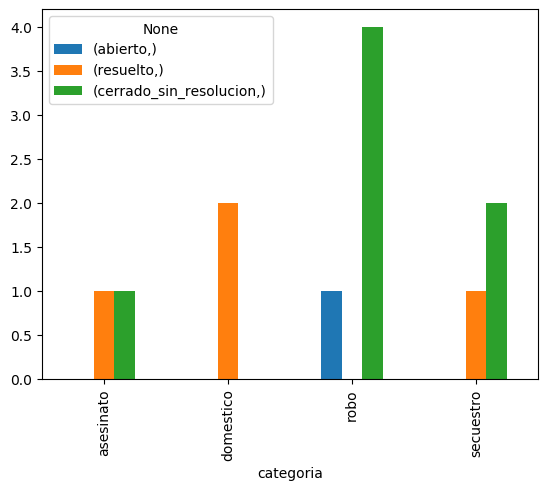

In [52]:
casos_policiales_sin_batman_final.plot(kind='bar')

In [53]:
#ahora, los casos con la participacion de batman
casos_policiales_con_batman = casos_policiales_batman_unstacked['con_batman']
casos_policiales_con_batman

categoria  estado_caso
asesinato  2              3.0
           3              2.0
domestico  2              4.0
           3              1.0
robo       1              1.0
           2              2.0
           3              3.0
secuestro  2              2.0
           3              3.0
Name: con_batman, dtype: float64

In [54]:
casos_policiales_con_batman_final = casos_policiales_con_batman.unstack()
casos_policiales_con_batman_final

estado_caso,1,2,3
categoria,,,
asesinato,NaN,3.0,2.0
domestico,NaN,4.0,1.0
robo,1.0,2.0,3.0
secuestro,NaN,2.0,3.0


In [55]:
#renombro columnas
casos_policiales_con_batman_final.columns = [['abierto','resuelto','cerrado_sin_resolucion']]
casos_policiales_con_batman_final

,abierto,resuelto,cerrado_sin_resolucion
categoria,,,
asesinato,NaN,3.0,2.0
domestico,NaN,4.0,1.0
robo,1.0,2.0,3.0
secuestro,NaN,2.0,3.0


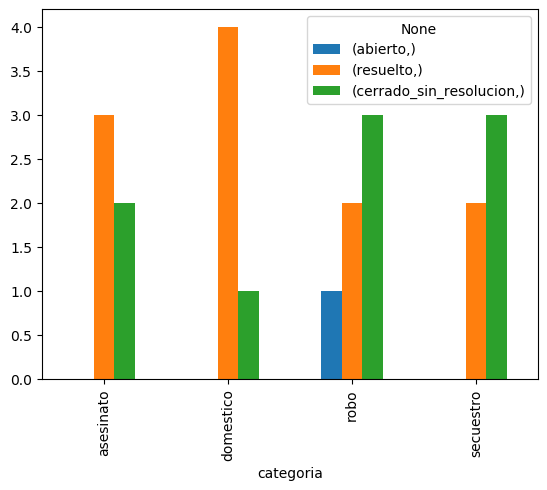

In [56]:
casos_policiales_con_batman_final.plot(kind='bar')

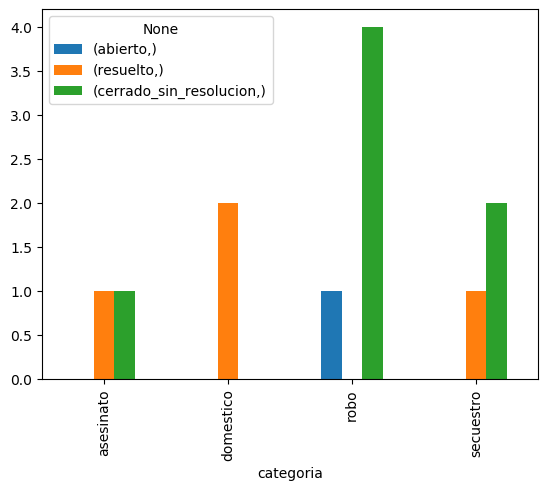

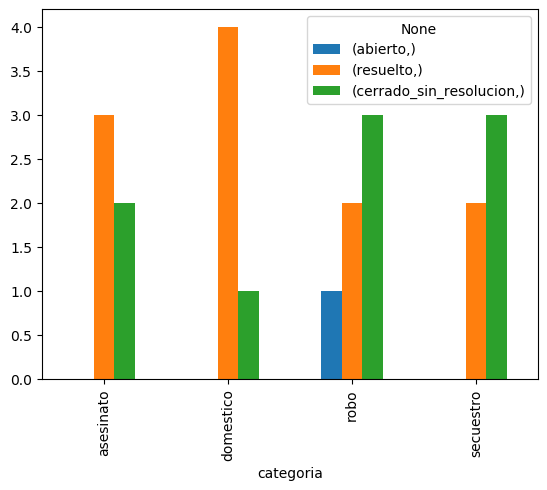

In [57]:
casos_policiales_sin_batman_final.plot(kind='bar')
casos_policiales_con_batman_final.plot(kind='bar')

In [65]:
#ahora, analizo el mes del 2018 en el que batman tuvo mayor participacion
#generamos  nuevas columnas setenado el tipo datetime
casos_policiales_actual = casos_policiales

In [70]:
casos_policiales_actual['fecha_datetime'] = pd.to_datetime(casos_policiales_actual['fecha'])
casos_policiales_actual['anio'] = casos_policiales_actual['fecha_datetime'].dt.year
casos_policiales_actual['mes'] = casos_policiales_actual['fecha_datetime'].dt.month

casos_policiales_actual

,fecha,id_caso,descripcion,estado_caso,categoria,latitud,longitud,fecha_datetime,anio,mes
0,4/5/2019,135,Donec consectetur nulla et sem.,1,robo,75.36,18.18,2019-04-05,2019,4
1,3/4/2018,183,Aliquam vel enim a massa.,3,asesinato,75.07,18.91,2018-03-04,2018,3
2,3/29/2020,145,"Nulla risus sem, rhoncus sed.",3,secuestro,76.43,17.08,2020-03-29,2020,3
3,11/29/2018,102,Fusce volutpat lectus eu cursus.,2,domestico,76.01,17.15,2018-11-29,2018,11
4,2/25/2019,150,"Aenean eu leo porta, vestibulum.",3,robo,76.29,18.55,2019-02-25,2019,2
5,10/11/2019,121,Nam eu auctor tortor. Donec.,2,asesinato,75.76,18.34,2019-10-11,2019,10
6,5/26/2018,151,Suspendisse quis vehicula enim. Nullam.,2,secuestro,75.54,19.18,2018-05-26,2018,5
7,2/25/2019,105,"Proin et urna aliquam, lacinia.",3,domestico,76.96,19.85,2019-02-25,2019,2
8,6/20/2018,135,Phasellus sed lorem sed elit.,3,robo,75.87,19.78,2018-06-20,2018,6
9,2/24/2019,137,"Nullam lorem tortor, suscipit sed.",3,asesinato,76.24,18.84,2019-02-24,2019,2


In [71]:
#merge de los dataframes a usar, casos_policiales_actual y respuestas_batman
mayor_participacion_batman = pd.merge(casos_policiales_actual,respuestas_batman,on='id_caso')
mayor_participacion_batman

,fecha,id_caso,descripcion,estado_caso,categoria,latitud,longitud,fecha_datetime,anio,mes,respuesta
0,4/5/2019,135,Donec consectetur nulla et sem.,1,robo,75.36,18.18,2019-04-05,2019,4,0
1,4/5/2019,135,Donec consectetur nulla et sem.,1,robo,75.36,18.18,2019-04-05,2019,4,1
2,6/20/2018,135,Phasellus sed lorem sed elit.,3,robo,75.87,19.78,2018-06-20,2018,6,0
3,6/20/2018,135,Phasellus sed lorem sed elit.,3,robo,75.87,19.78,2018-06-20,2018,6,1
4,3/4/2018,183,Aliquam vel enim a massa.,3,asesinato,75.07,18.91,2018-03-04,2018,3,1
5,3/29/2020,145,"Nulla risus sem, rhoncus sed.",3,secuestro,76.43,17.08,2020-03-29,2020,3,1
6,3/29/2020,145,"Nulla risus sem, rhoncus sed.",3,secuestro,76.43,17.08,2020-03-29,2020,3,1
7,6/12/2019,145,"Integer imperdiet ultrices massa, et.",2,domestico,75.78,18.86,2019-06-12,2019,6,1
8,6/12/2019,145,"Integer imperdiet ultrices massa, et.",2,domestico,75.78,18.86,2019-06-12,2019,6,1
9,11/29/2018,102,Fusce volutpat lectus eu cursus.,2,domestico,76.01,17.15,2018-11-29,2018,11,1


In [72]:
mayor_participacion_batman_agrupado = mayor_participacion_batman.groupby(['mes','anio','respuesta']).agg({'id_caso':'count'})
mayor_participacion_batman_agrupado

id_caso
mes anio respuesta         
1   2018 1                1
    2020 1                1
2   2019 0                2
         1                1
    2020 0                1
3   2018 0                2
         1                3
    2019 0                1
    2020 1                2
4   2018 1                1
    2019 0                1
         1                1
5   2018 0                2
         1                1
6   2018 0                1
         1                2
    2019 1                2
7   2018 1                1
    2019 0                1
9   2019 0                1
10  2018 1                1
    2019 1                3
11  2018 1                1

In [74]:
mayor_participacion_batman_agrupado.columns = ['cantidad']
mayor_participacion_batman_agrupado

cantidad
mes anio respuesta          
1   2018 1                 1
    2020 1                 1
2   2019 0                 2
         1                 1
    2020 0                 1
3   2018 0                 2
         1                 3
    2019 0                 1
    2020 1                 2
4   2018 1                 1
    2019 0                 1
         1                 1
5   2018 0                 2
         1                 1
6   2018 0                 1
         1                 2
    2019 1                 2
7   2018 1                 1
    2019 0                 1
9   2019 0                 1
10  2018 1                 1
    2019 1                 3
11  2018 1                 1

In [76]:
mayor_participacion_batman_agrupado_unstacked = mayor_participacion_batman_agrupado.unstack()
mayor_participacion_batman_agrupado_unstacked

cantidad     
respuesta        0    1
mes anio               
1   2018       NaN  1.0
    2020       NaN  1.0
2   2019       2.0  1.0
    2020       1.0  NaN
3   2018       2.0  3.0
    2019       1.0  NaN
    2020       NaN  2.0
4   2018       NaN  1.0
    2019       1.0  1.0
5   2018       2.0  1.0
6   2018       1.0  2.0
    2019       NaN  2.0
7   2018       NaN  1.0
    2019       1.0  NaN
9   2019       1.0  NaN
10  2018       NaN  1.0
    2019       NaN  3.0
11  2018       NaN  1.0

In [78]:
#renombro columbras y aplano niveles de index
mayor_participacion_batman_agrupado_unstacked.columns = [['batman_no_respondio','batman_respondio']]
mayor_participacion_batman_agrupado_unstacked

batman_no_respondio batman_respondio
mes anio                                     
1   2018                 NaN              1.0
    2020                 NaN              1.0
2   2019                 2.0              1.0
    2020                 1.0              NaN
3   2018                 2.0              3.0
    2019                 1.0              NaN
    2020                 NaN              2.0
4   2018                 NaN              1.0
    2019                 1.0              1.0
5   2018                 2.0              1.0
6   2018                 1.0              2.0
    2019                 NaN              2.0
7   2018                 NaN              1.0
    2019                 1.0              NaN
9   2019                 1.0              NaN
10  2018                 NaN              1.0
    2019                 NaN              3.0
11  2018                 NaN              1.0

In [80]:
participaciones_batman = mayor_participacion_batman_agrupado_unstacked[['batman_respondio']]
participaciones_batman

batman_respondio
mes anio                 
1   2018              1.0
    2020              1.0
2   2019              1.0
    2020              NaN
3   2018              3.0
    2019              NaN
    2020              2.0
4   2018              1.0
    2019              1.0
5   2018              1.0
6   2018              2.0
    2019              2.0
7   2018              1.0
    2019              NaN
9   2019              NaN
10  2018              1.0
    2019              3.0
11  2018              1.0

In [82]:
#todas las participaciones de batman por ano y mes
participaciones_batman_unstacked = participaciones_batman.unstack()
participaciones_batman_unstacked

batman_respondio          
anio             2018 2019 2020
mes                            
1                 1.0  NaN  1.0
2                 NaN  1.0  NaN
3                 3.0  NaN  2.0
4                 1.0  1.0  NaN
5                 1.0  NaN  NaN
6                 2.0  2.0  NaN
7                 1.0  NaN  NaN
9                 NaN  NaN  NaN
10                1.0  3.0  NaN
11                1.0  NaN  NaN

In [84]:
participaciones_batman_unstacked.columns = [['2018','2019','2020']]
participaciones_batman_unstacked

,2018,2019,2020
mes,,,
1,1.0,NaN,1.0
2,NaN,1.0,NaN
3,3.0,NaN,2.0
4,1.0,1.0,NaN
5,1.0,NaN,NaN
6,2.0,2.0,NaN
7,1.0,NaN,NaN
9,NaN,NaN,NaN
10,1.0,3.0,NaN


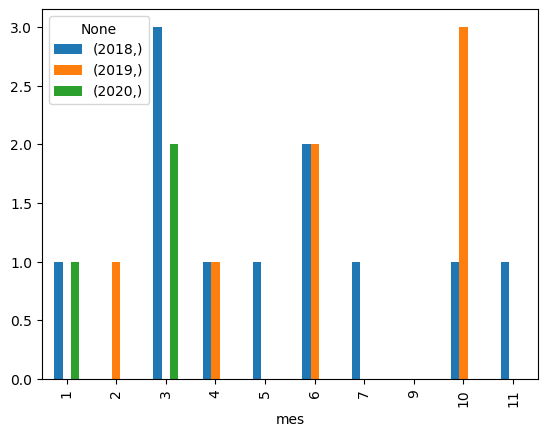

In [85]:
participaciones_batman_unstacked.plot(kind='bar')

In [87]:
participaciones_batman_final = participaciones_batman_unstacked [['2018']]
participaciones_batman_final

,2018
mes,
1,1.0
2,NaN
3,3.0
4,1.0
5,1.0
6,2.0
7,1.0
9,NaN
10,1.0


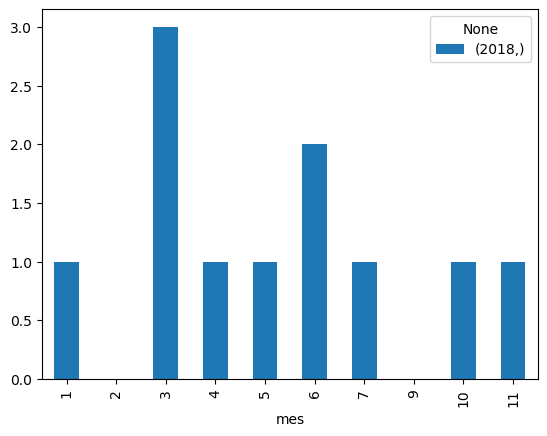

In [89]:
participaciones_batman_final.plot(kind='bar')

In [ ]:
#FINAL